This notebook is used to postprocessing the inverse modeling results of the cloud chamber model.

In [1]:
# Libraries
from pathlib import Path
import itertools
import pandas as pd
import numpy as np

from kim.map import KIM
from kim.data import Data
from kim.mapping_model import MLP
from kim.utils import plot_sensitivity_mask, plot_sensitivity

import jax

%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# # define the colors
# cmap = mpl.colors.ListedColormap(['white', 'k'])

# # create a normalize object the describes the limits of
# # each color
# bounds = [-.5, 0.5, 1.5]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


In [4]:
jax.devices()

12:19:17 INFO:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
12:19:17 INFO:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


[CpuDevice(id=0)]

# Files/folders/parameters

In [5]:
dir_case = Path("/people/jian449/KIM/examples/im_cloudmodel")
# Training data
dir_data = dir_case / "data"
f_para = dir_data / "Output_512.csv"
# Saving folder
dir_results = dir_case / "results"


In [6]:
# Locations of the points
# middle_pts = ['s1', 's10', 's19']
# cold_pts = ['s2', 's3', 's9', 's11', 's12', 's18', 's20', 's21', 's27']
# warm_pts = ['s5', 's6', 's7', 's14', 's15', 's16', 's23', 's24', 's25']

# Multiple criteria
# middle_pts_r = [True, False]
# all_ss_varns = [True, False]
# wstd = [True, False]
# wall_types = ['cold', 'warm', 'both']
middle_pts_r = ['mp', 'nomp']
all_ss_varns = ['ss', 'noss']
wstd = ['wstd', 'nowstd']
wall_types = ['cold', 'warm', 'both']
temperature = ['t', 'not']

In [7]:
# Get all combinations
combinations = itertools.product(middle_pts_r, all_ss_varns, wstd, wall_types, temperature)
label_set, f_state_set, f_kim_set, f_sensi_set = [], [], [], []
for mp, ss, w, wall, t in combinations:
    label = f'{mp}-{ss}-{w}-{wall}-{t}'
    f_state_subset = dir_data / f'Input-{label}.csv'
    f_kim_save = dir_results / f'KIM-{label}'
    f_sensitivity_save = dir_results / f'Data-{label}'

    label_set.append(label)
    f_state_set.append(f_state_subset)
    f_kim_set.append(f_kim_save)
    f_sensi_set.append(f_sensitivity_save)


# Load the results

In [8]:
df_para = pd.read_csv(f_para)
y, y_vars = df_para.values, df_para.keys().to_list()


In [9]:
# f_data_save = Path("./results/data")
f_data_save = dir_case / "results/data"
data_set, kim_set = [], []
for i,f_state in enumerate(f_state_set):
    label, f_sensi, f_kim = label_set[i], f_sensi_set[i], f_kim_set[i]
    df_state = pd.read_csv(f_state,  index_col=0)
    x = df_state.values
    logging.info(f'Combination: {label}; total number of keys: {x.shape}.')
    # Preliminary analysis result
    data = Data(x, y)
    data.load(f_sensi)
    # Mapping result
    kim = KIM(data, map_configs={}, mask_option="cond_sensitivity", map_option='many2one')
    # Load the trained mappings
    kim.load(f_kim)
    
    kim_set.append(kim)
    data_set.append(data)


12:20:47 INFO:Combination: mp-ss-wstd-cold-t; total number of keys: (513, 972).
12:20:55 INFO:Combination: mp-ss-wstd-cold-not; total number of keys: (513, 756).
12:21:02 INFO:Combination: mp-ss-wstd-warm-t; total number of keys: (513, 972).
12:21:09 INFO:Combination: mp-ss-wstd-warm-not; total number of keys: (513, 756).
12:21:16 INFO:Combination: mp-ss-wstd-both-t; total number of keys: (513, 1458).
12:21:23 INFO:Combination: mp-ss-wstd-both-not; total number of keys: (513, 1134).
12:21:31 INFO:Combination: mp-ss-nowstd-cold-t; total number of keys: (513, 864).
12:21:39 INFO:Combination: mp-ss-nowstd-cold-not; total number of keys: (513, 648).
12:21:46 INFO:Combination: mp-ss-nowstd-warm-t; total number of keys: (513, 864).
12:21:52 INFO:Combination: mp-ss-nowstd-warm-not; total number of keys: (513, 648).
12:21:58 INFO:Combination: mp-ss-nowstd-both-t; total number of keys: (513, 1296).
12:22:07 INFO:Combination: mp-ss-nowstd-both-not; total number of keys: (513, 972).
12:22:15 INFO

# Post analysis

In [10]:
results = {}
for i,kim in enumerate(kim_set):
    label = label_set[i]
    results[label] = kim.evaluate_maps_on_givendata()

/people/jian449/.conda/envs/kim/lib/python3.12/site-packages/hydroeval/objective_functions.py:80: RuntimeWarning: invalid value encountered in divide
  r = r_num / r_den
/people/jian449/.conda/envs/kim/lib/python3.12/site-packages/hydroeval/objective_functions.py:126: RuntimeWarning: invalid value encountered in divide
  r = r_num / r_den
/people/jian449/.conda/envs/kim/lib/python3.12/site-packages/hydroeval/objective_functions.py:80: RuntimeWarning: invalid value encountered in divide
  r = r_num / r_den
/people/jian449/.conda/envs/kim/lib/python3.12/site-packages/hydroeval/objective_functions.py:126: RuntimeWarning: invalid value encountered in divide
  r = r_num / r_den
/people/jian449/.conda/envs/kim/lib/python3.12/site-packages/hydroeval/objective_functions.py:80: RuntimeWarning: invalid value encountered in divide
  r = r_num / r_den
/people/jian449/.conda/envs/kim/lib/python3.12/site-packages/hydroeval/objective_functions.py:126: RuntimeWarning: invalid value encountered in divi

## Plot results of one KIM

In [ ]:
# train_or_test = 'test'
# fig, axes = plt.subplots(2,3,figsize=(15,10))
# for i in range(2):
#     y_var = y_vars[i]
#     for j in range(3):
#         model = labels[j]
#         r = results[model]
#         ax = axes[i,j]
#         x = r['true'][train_or_test][...,i]
#         y = r['weighted mean predict'][train_or_test][...,i]
#         yens = r['ens predict'][train_or_test][...,i]
#         w = r['weights'][...,i]
#         std = np.sqrt(np.average((yens-y)**2, weights=w, axis=0))
#         ax.errorbar(x, y, std, color='black', linestyle='None', fmt='o', markersize=2, capsize=2)
#         lim = ax.get_ylim()
#         ax.plot(lim, lim, '--', color='tab:blue')
#         ax.set(xlim=lim, ylim=lim, xlabel='True', ylabel='Prediction', title=f"{model}: {y_var}")


/tmp/ipykernel_25107/1639621021.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


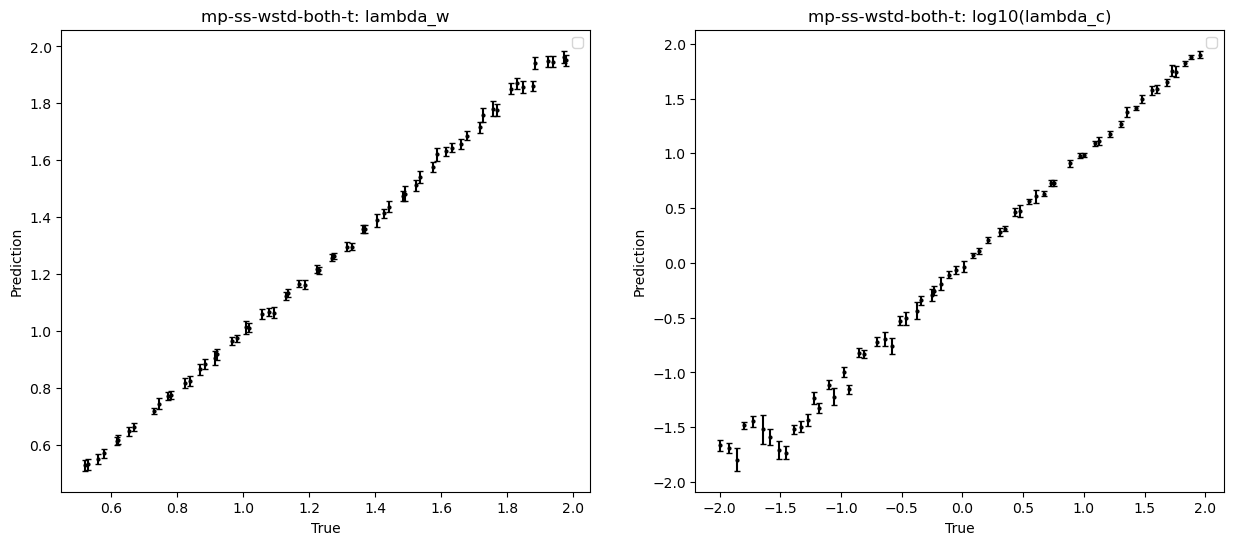

In [11]:
train_or_test = 'test'
# label_set_plot = ['nompR-noss-nowstd-cold', 'nompR-ss-nowstd-warm', 'nompR-ss-nowstd-both', 'nompR-noss-nowstd-cold']
label_set_plot = ['mp-ss-wstd-both-t']
fig, axes = plt.subplots(len(label_set_plot), 2, figsize=(15,6))
for i in range(2):
    y_var = y_vars[i]
    for j,model in enumerate(label_set_plot):
        kim = kim_set[j]
        r = results[model]
        ax = axes[i]
        x = r['true'][train_or_test][...,i]
        y = r['weighted mean predict'][train_or_test][...,i]
        std = r['weighted std predict'][train_or_test][...,i]
        bias = r['weighted bias'][train_or_test][i]
        ax.errorbar(x, y, std, color='black', linestyle='None', fmt='o', markersize=2, capsize=2)
        # ax.set(xlabel='True', ylabel='Prediction', title=f"{model}: {y_var} \n (bias: {bias})")
        ax.set(xlabel='True', ylabel='Prediction', title=f"{model}: {y_var}")
        ax.legend()


## Impact of subsetting

In [12]:
train_or_test = 'test'
stats = []
for i,y in enumerate(y_vars):
    stats_y = []
    for label in label_set:
        r = results[label]
        metrics = [r['weighted bias'][train_or_test][i], r['weighted relative uncertainty'][train_or_test][i]]
        stats_y.append(metrics+label.split('-'))
    df = pd.DataFrame(stats_y, columns=['bias', 'uncertainty', 'mp', 'ss', 'wstd', 'wall', 't'])
    stats.append(df)

In [26]:
stats[1].sort_values(by='bias')

,bias,uncertainty,mp,ss,wstd,wall,t
34,0.056331,0.028176,nomp,ss,nowstd,both,t
46,0.057894,0.020350,nomp,noss,nowstd,both,t
28,0.059433,0.041903,nomp,ss,wstd,both,t
32,0.059697,0.023838,nomp,ss,nowstd,warm,t
40,0.059725,0.021346,nomp,noss,wstd,both,t
22,0.060298,0.027782,mp,noss,nowstd,both,t
10,0.060934,0.032101,mp,ss,nowstd,both,t
44,0.061100,0.031647,nomp,noss,nowstd,warm,t
38,0.062186,0.017397,nomp,noss,wstd,warm,t
26,0.062271,0.028543,nomp,ss,wstd,warm,t


[Text(0.5, 1.0, 'log10(lambda_c)')]

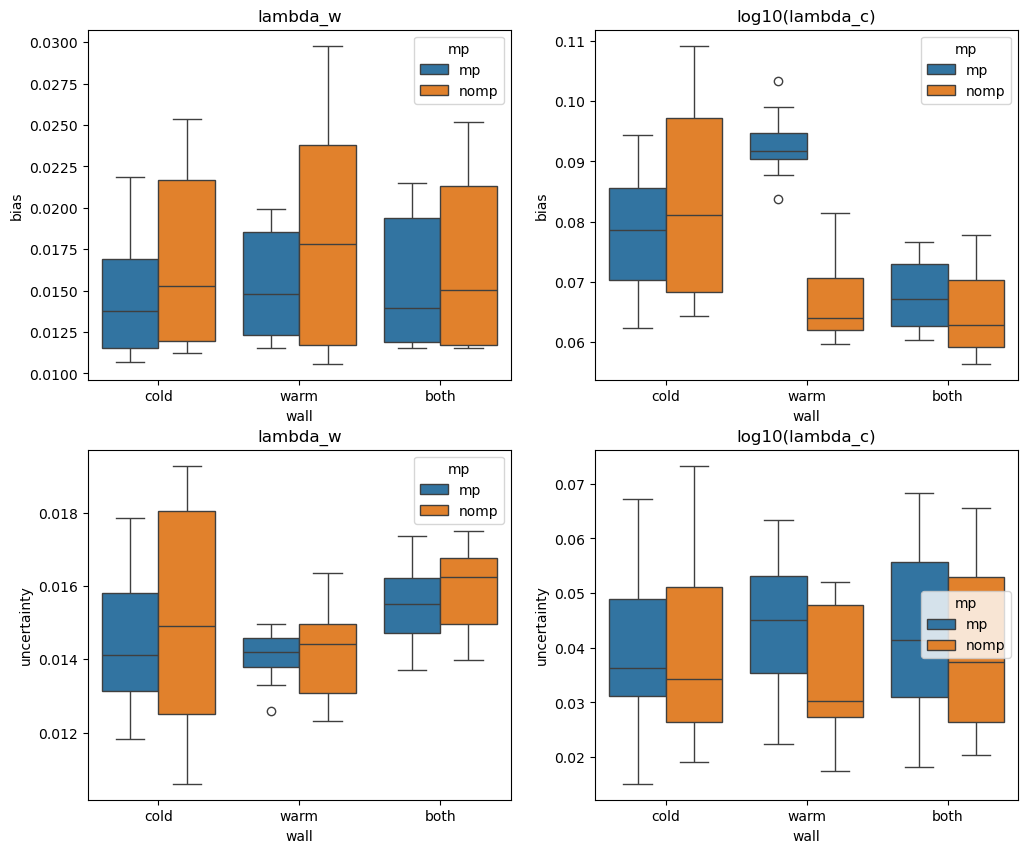

In [21]:
i = 1
# x, hue = 'wall', 'wstd'
x, hue = 'wall', 'mp'
# x, hue = 'wall', 'ss'
fig, axes = plt.subplots(2, 2, figsize=(12,10), sharey=False)
sns.boxplot(data=stats[0], x=x, y='bias', hue=hue, ax=axes[0,0])
sns.boxplot(data=stats[1], x=x, y='bias', hue=hue, ax=axes[0,1])
sns.boxplot(data=stats[0], x=x, y='uncertainty', hue=hue, ax=axes[1,0])
sns.boxplot(data=stats[1], x=x, y='uncertainty', hue=hue, ax=axes[1,1])
axes[0,0].set(title=y_vars[0]); axes[0,1].set(title=y_vars[1])
axes[1,0].set(title=y_vars[0]); axes[1,1].set(title=y_vars[1])
# plt.suptitle(y_vars[i])


[Text(0.5, 1.0, 'log10(lambda_c)')]

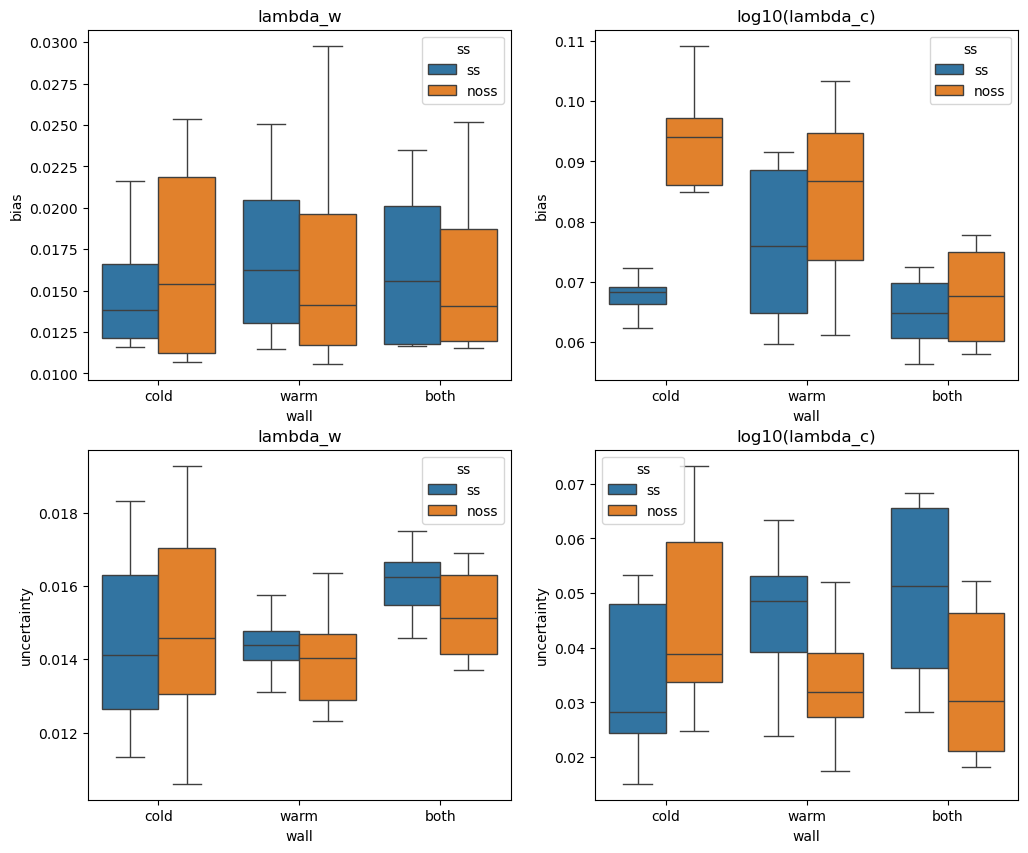

In [24]:
i = 1
# x, hue = 'wall', 'wstd'
# x, hue = 'wall', 't'
x, hue = 'wall', 'ss'
fig, axes = plt.subplots(2, 2, figsize=(12,10), sharey=False)
sns.boxplot(data=stats[0], x=x, y='bias', hue=hue, ax=axes[0,0])
sns.boxplot(data=stats[1], x=x, y='bias', hue=hue, ax=axes[0,1])
sns.boxplot(data=stats[0], x=x, y='uncertainty', hue=hue, ax=axes[1,0])
sns.boxplot(data=stats[1], x=x, y='uncertainty', hue=hue, ax=axes[1,1])
axes[0,0].set(title=y_vars[0]); axes[0,1].set(title=y_vars[1])
axes[1,0].set(title=y_vars[0]); axes[1,1].set(title=y_vars[1])
# plt.suptitle(y_vars[i])


## Prediction versus true

/tmp/ipykernel_31385/4194660411.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


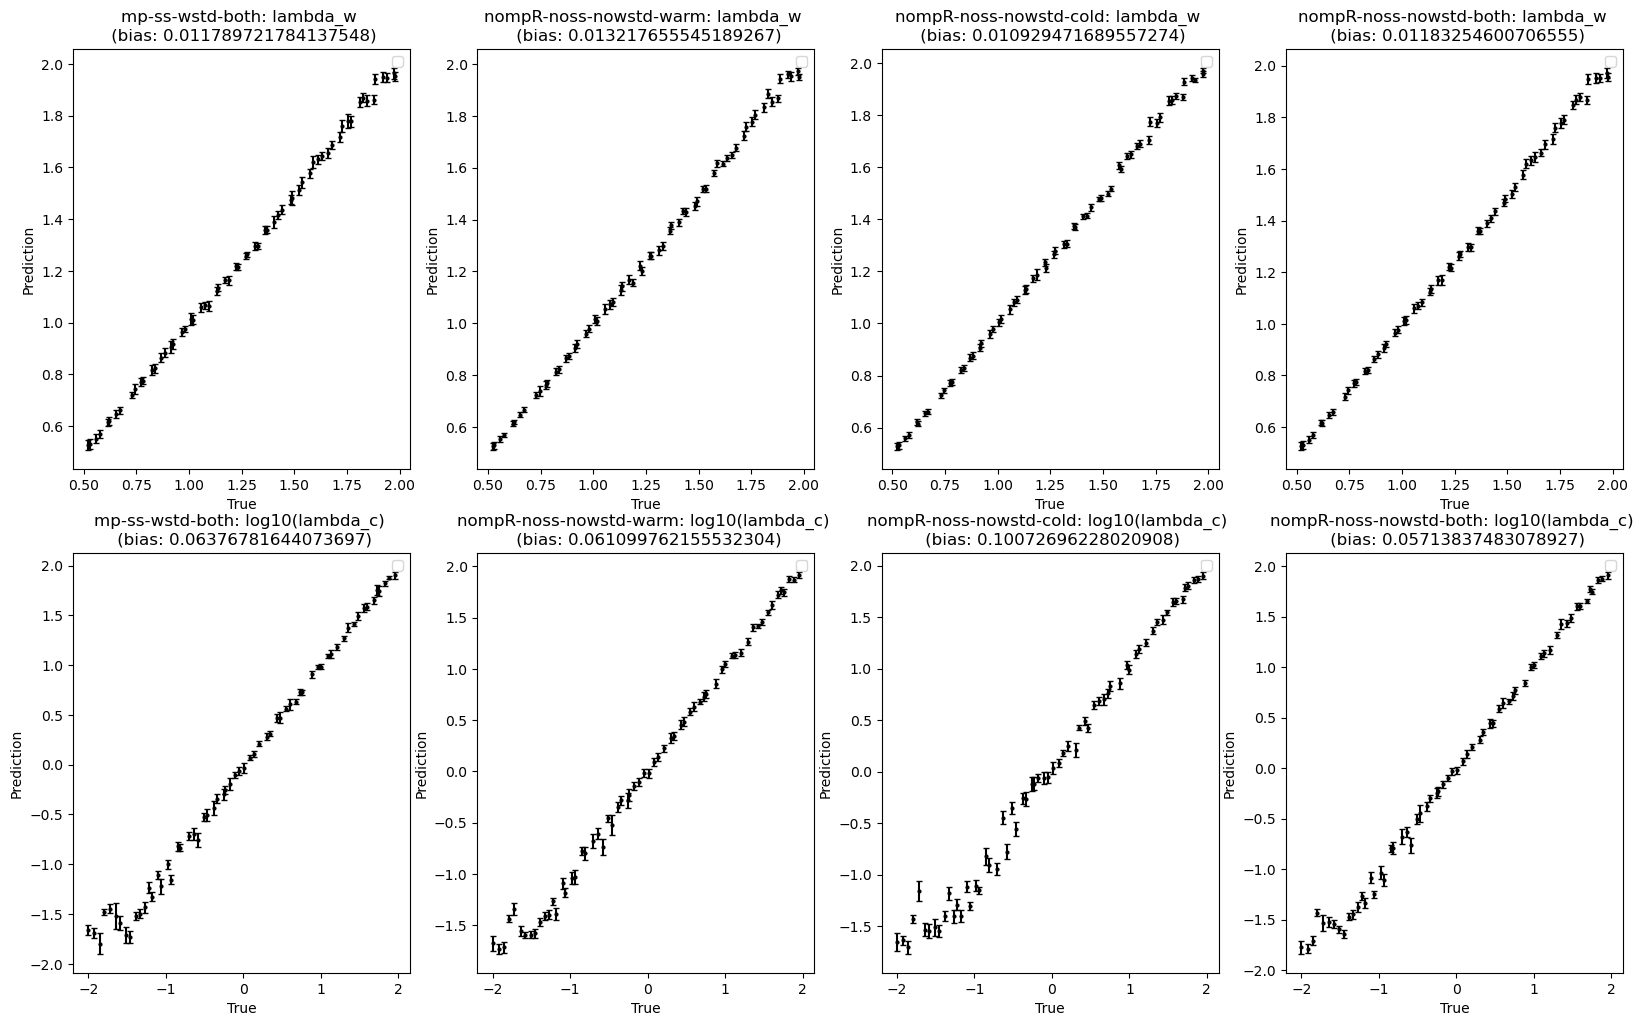

In [ ]:
train_or_test = 'test'
# label_set_plot = ['nompR-noss-nowstd-cold', 'nompR-ss-nowstd-warm', 'nompR-ss-nowstd-both', 'nompR-noss-nowstd-cold']
label_set_plot = ['mp-ss-wstd-both', 'nompR-noss-nowstd-warm', 'nompR-noss-nowstd-cold', 'nompR-noss-nowstd-both']
fig, axes = plt.subplots(2,len(label_set_plot),figsize=(20,12))
for i in range(2):
    y_var = y_vars[i]
    for j,model in enumerate(label_set_plot):
        kim = kim_set[j]
        r = results[model]
        ax = axes[i,j]
        x = r['true'][train_or_test][...,i]
        y = r['weighted mean predict'][train_or_test][...,i]
        std = r['weighted std predict'][train_or_test][...,i]
        bias = r['weighted bias'][train_or_test][i]
        ax.errorbar(x, y, std, color='black', linestyle='None', fmt='o', markersize=2, capsize=2)
        ax.set(xlabel='True', ylabel='Prediction', title=f"{model}: {y_var} \n (bias: {bias})")
        ax.legend()


/tmp/ipykernel_25107/1150064998.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


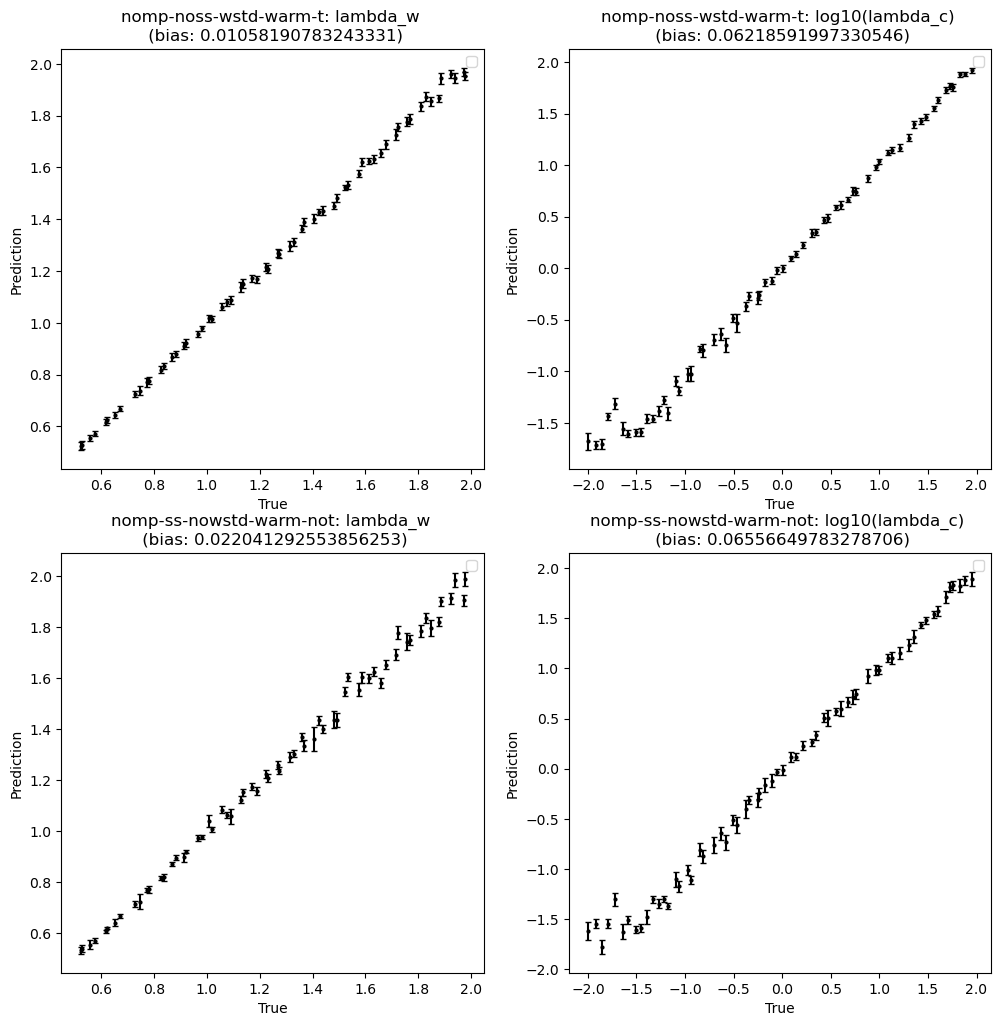

In [17]:
train_or_test = 'test'
label_set_plot = ['nomp-noss-wstd-warm-t', 'nomp-ss-nowstd-warm-not']
fig, axes = plt.subplots(len(label_set_plot),2,figsize=(12,12))
for i in range(2):
    y_var = y_vars[i]
    for j,model in enumerate(label_set_plot):
        kim = kim_set[j]
        r = results[model]
        ax = axes[j,i]
        x = r['true'][train_or_test][...,i]
        y = r['weighted mean predict'][train_or_test][...,i]
        std = r['weighted std predict'][train_or_test][...,i]
        bias = r['weighted bias'][train_or_test][i]
        ax.errorbar(x, y, std, color='black', linestyle='None', fmt='o', markersize=2, capsize=2)
        ax.set(xlabel='True', ylabel='Prediction', title=f"{model}: {y_var} \n (bias: {bias})")
        ax.legend()


/tmp/ipykernel_25107/2933402043.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


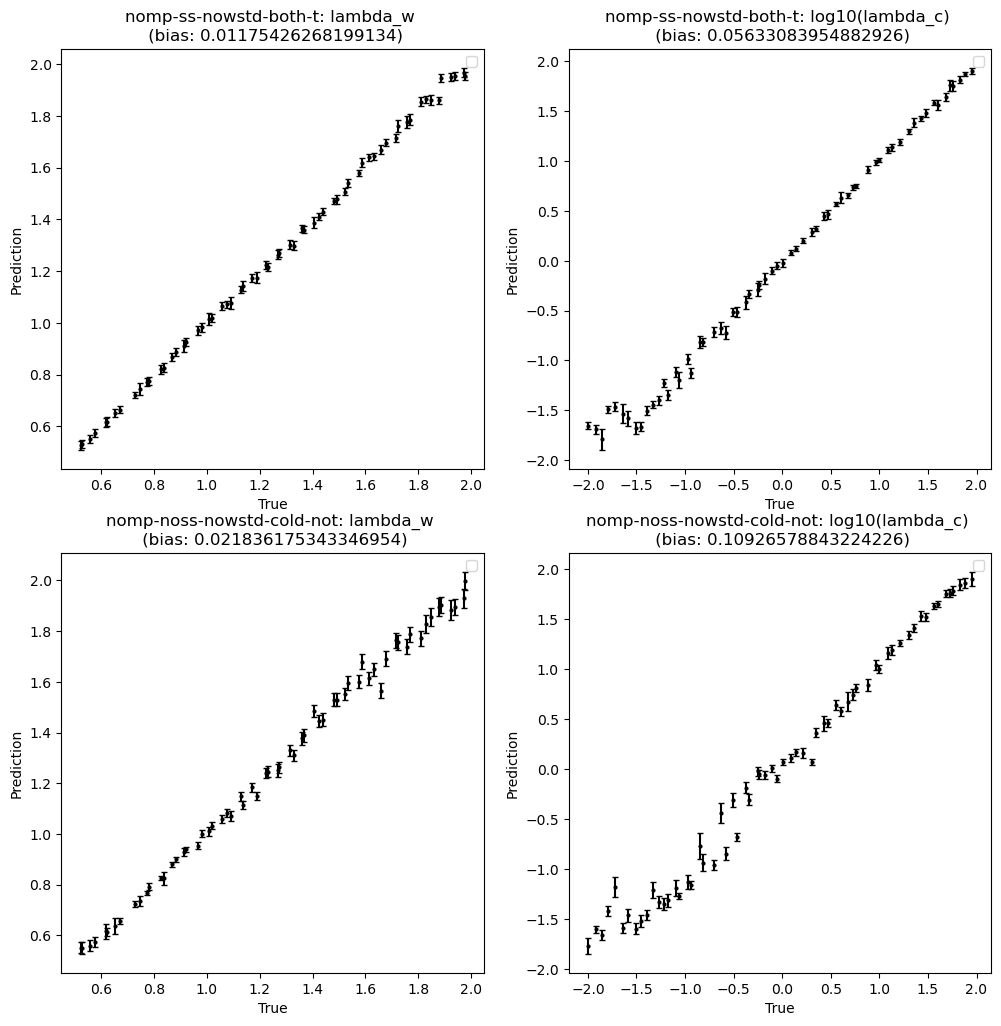

In [19]:
train_or_test = 'test'
label_set_plot = ['nomp-ss-nowstd-both-t', 'nomp-noss-nowstd-cold-not']
fig, axes = plt.subplots(len(label_set_plot),2,figsize=(12,12))
for i in range(2):
    y_var = y_vars[i]
    for j,model in enumerate(label_set_plot):
        kim = kim_set[j]
        r = results[model]
        ax = axes[j,i]
        x = r['true'][train_or_test][...,i]
        y = r['weighted mean predict'][train_or_test][...,i]
        std = r['weighted std predict'][train_or_test][...,i]
        bias = r['weighted bias'][train_or_test][i]
        ax.errorbar(x, y, std, color='black', linestyle='None', fmt='o', markersize=2, capsize=2)
        ax.set(xlabel='True', ylabel='Prediction', title=f"{model}: {y_var} \n (bias: {bias})")
        ax.legend()
